In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from utils import *
from algos import *
from plot import *

**Вариант 11**

In [7]:
def f(x):
  return x**4 + x**2 + x + 1

def fd1(x):
  return 4 * x**3 + 2 * x + 1

a, b = -1, 0
EXACT_MIN_POINT = Point(x=-0.38546, y=0.78520)

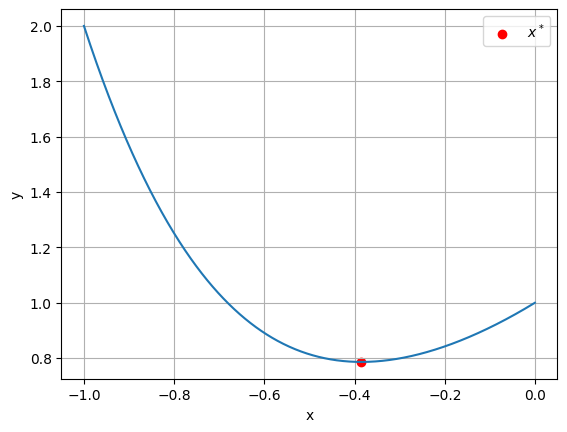

In [6]:
x = np.arange(a, b, 0.001)
y = [f(y) for y in x]

fig, ax = plt.subplots()
ax.scatter(EXACT_MIN_POINT.x, EXACT_MIN_POINT.y, c='r', label='$x^*$')
ax.plot(x, y)
ax.set(xlabel='x', ylabel='y')
ax.legend()
ax.grid()
plt.show()